 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [592]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [593]:
# Reading whale returns
whale_returns = pd.read_csv(".\Resources\whale_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns.sample(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2017-02-24,0.001097,-0.003004,0.001260,-0.002846
2016-03-09,0.005794,0.009729,0.004657,0.007993
2015-08-26,0.022246,0.016487,0.029021,0.031408


In [594]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [595]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [596]:
# Reading algorithmic returns
algo_returns = pd.read_csv("./Resources/algo_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns.sample(3)

,Algo 1,Algo 2
Date,,
2015-09-11,0.005597,0.001546
2015-10-05,0.026381,0.019278
2019-01-22,0.004236,-0.011539


In [597]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [598]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [599]:
# Reading S&P 500 Closing Prices
sp500_prices = pd.read_csv(".\Resources\sp500_history.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_prices.sample(3)

,Close
Date,
2014-09-10,$1995.69
2013-10-01,$1695.00
2017-04-24,$2374.15


In [600]:
# Check Data Types
sp500_prices.dtypes

Close    object
dtype: object

In [601]:
# Fix Data Types
sp500_prices["Close"] = sp500_prices["Close"].str.replace("$", "", regex = False).astype("float")
sp500_prices.dtypes

Close    float64
dtype: object

In [602]:
# Calculate Daily Returns
sp500_returns = sp500_prices.pct_change()

In [603]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()

In [604]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {"Close": "S&P500"}).copy()
sp500_returns.sample(3)

,S&P500
Date,
2015-10-23,0.001917
2014-10-28,0.001387
2019-02-25,0.000791


## Combine Whale, Algorithmic, and S&P 500 Returns

In [605]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")
combined_returns.sample(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2018-12-26,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,-0.008490
2015-11-23,-0.001089,-0.003781,0.003151,0.012117,0.012757,0.002214,-0.001221
2016-04-19,0.003920,0.009116,0.001913,-0.036515,-0.009745,0.007299,-0.000761


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

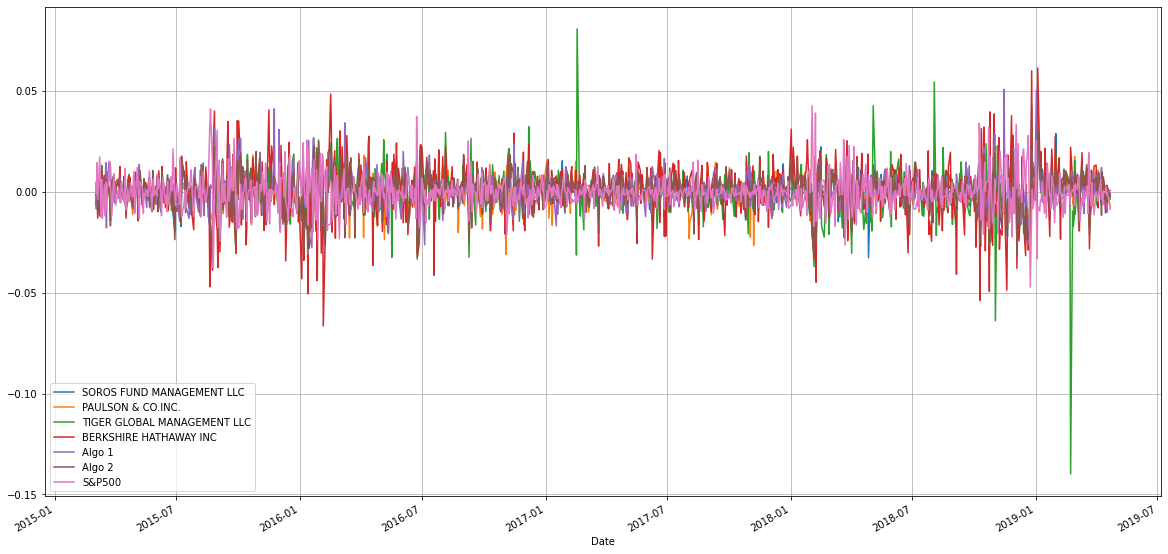

In [606]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20, 10), grid = True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

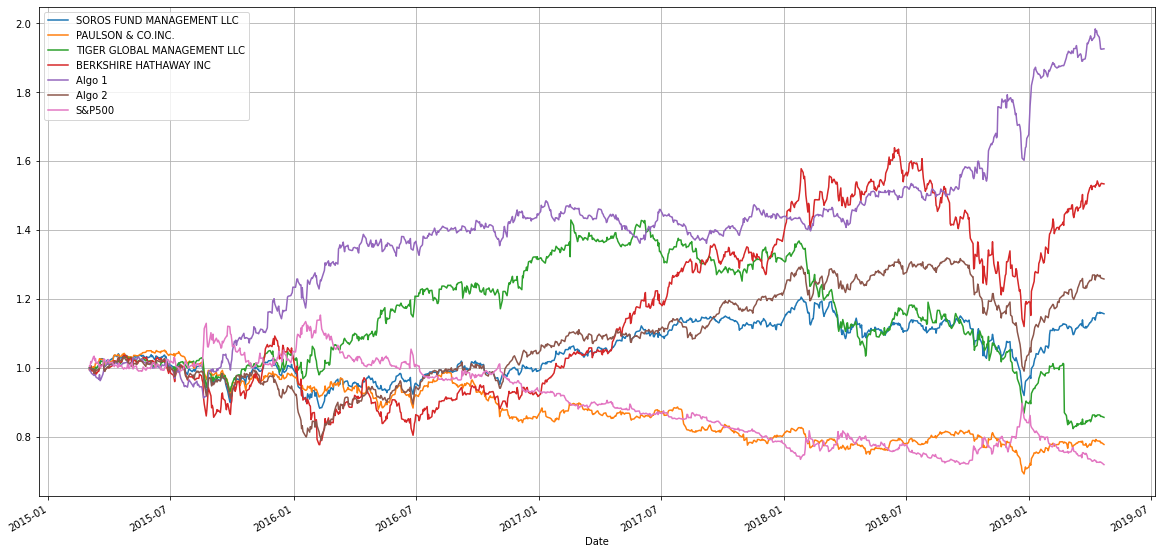

In [607]:
# Calculate cumulative returns of all portfolios
cumulative_combined_returns = (combined_returns + 1).cumprod()
# Plot cumulative returns
cumulative_combined_returns.plot(figsize = (20, 10), grid = True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

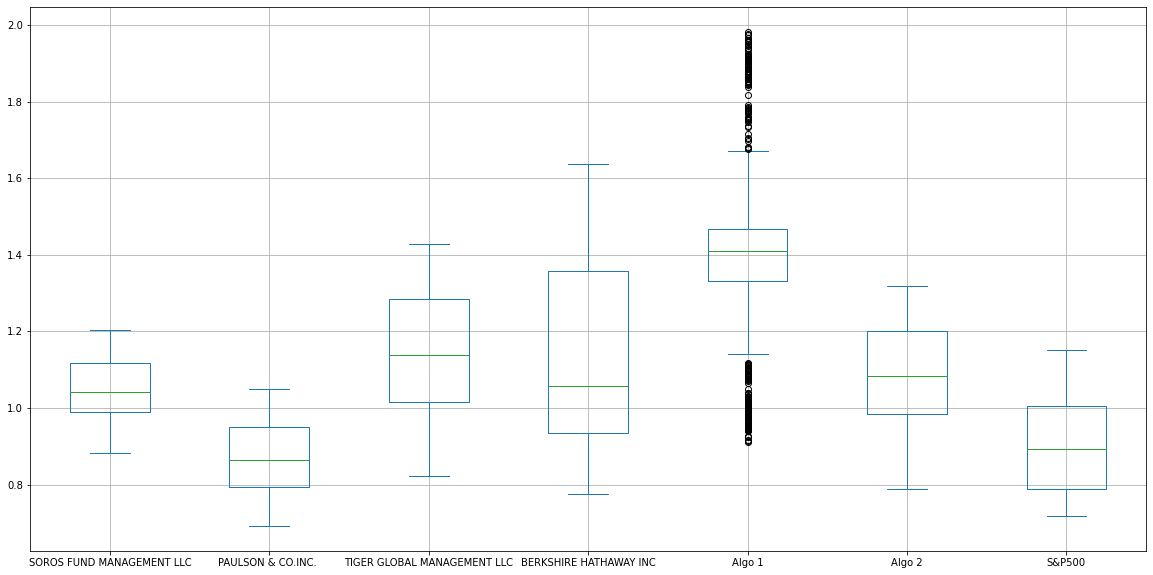

In [608]:
# Box plot to visually show risk
cumulative_combined_returns.plot(kind = "box", figsize = (20, 10), grid = True)

### Calculate Standard Deviations

In [609]:
# Calculate the daily standard deviations of all portfolios
cumulative_combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
S&P500                         0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [610]:
# Calculate  the daily standard deviation of S&P 500
portfolio_stds = cumulative_combined_returns.std()
sp500_std = portfolio_stds["S&P500"]
# Determine which portfolios are riskier than the S&P 500
for portfolio in portfolio_stds.drop("S&P500").index:
    if portfolio in portfolio_stds.index[portfolio_stds > portfolio_stds["S&P500"]]:
        print(f"{portfolio} is riskier than the S&P 500")
    else:
        print(f"{portfolio} is less risky than the S&P 500")

SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500
Algo 1 is riskier than the S&P 500
Algo 2 is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [611]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_stds * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
S&P500                         1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

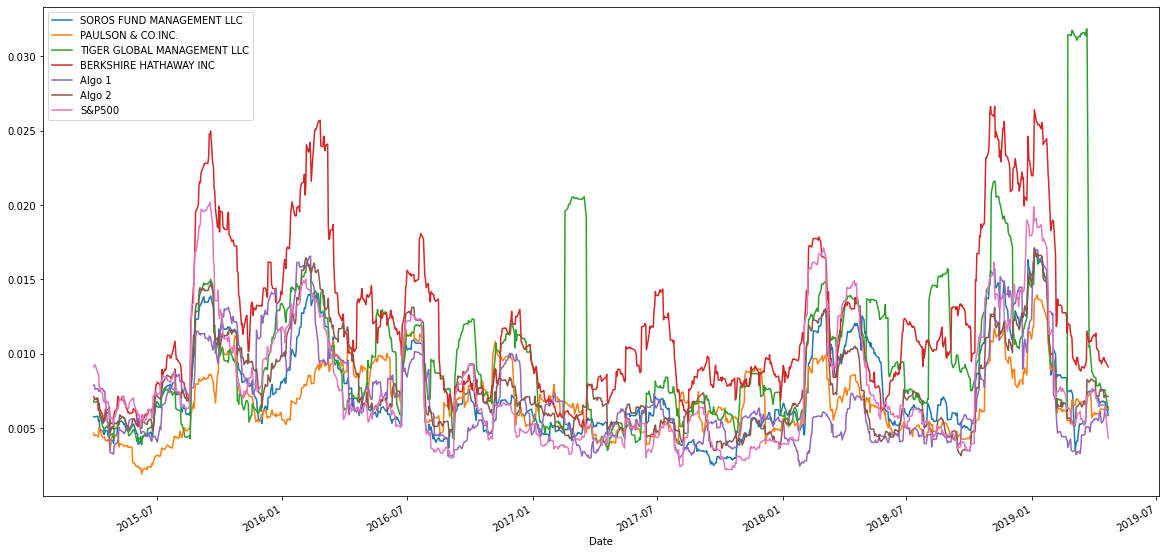

In [612]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_returns_21_days = combined_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
std_returns_21_days.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

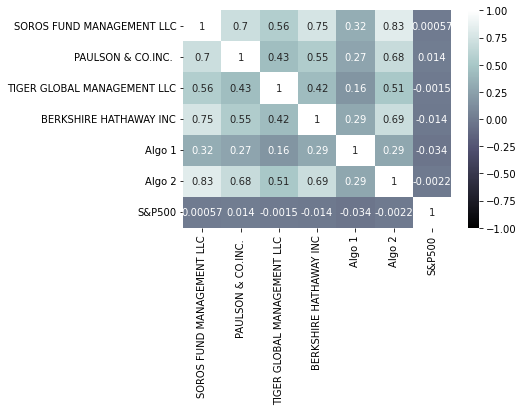

In [613]:
# Calculate the correlation
correlation_returns = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_returns, vmin = -1, vmax = 1, annot = True, cmap = "bone")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

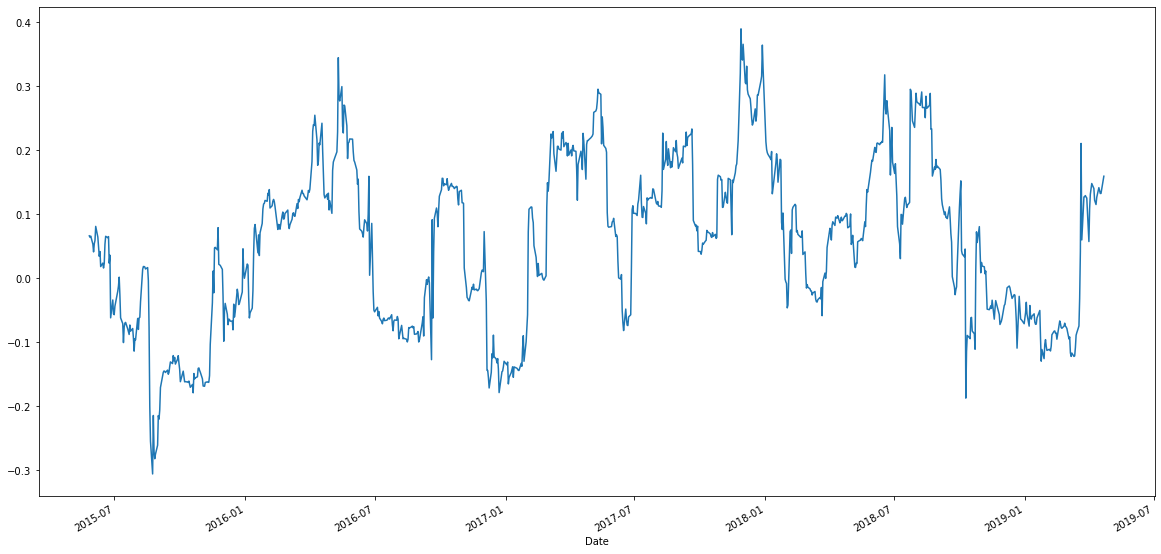

In [614]:
# Calculate covariance of a single portfolio
covariance_soros = combined_returns["SOROS FUND MANAGEMENT LLC"].rolling(window = 60).cov(combined_returns["S&P500"])
# Calculate variance of S&P 500
variance_sp500 = combined_returns["S&P500"].rolling(window = 60).var()
# Computing beta
beta_soros = (covariance_soros / variance_sp500)
# Plot beta trend
beta_soros.plot(figsize = (20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

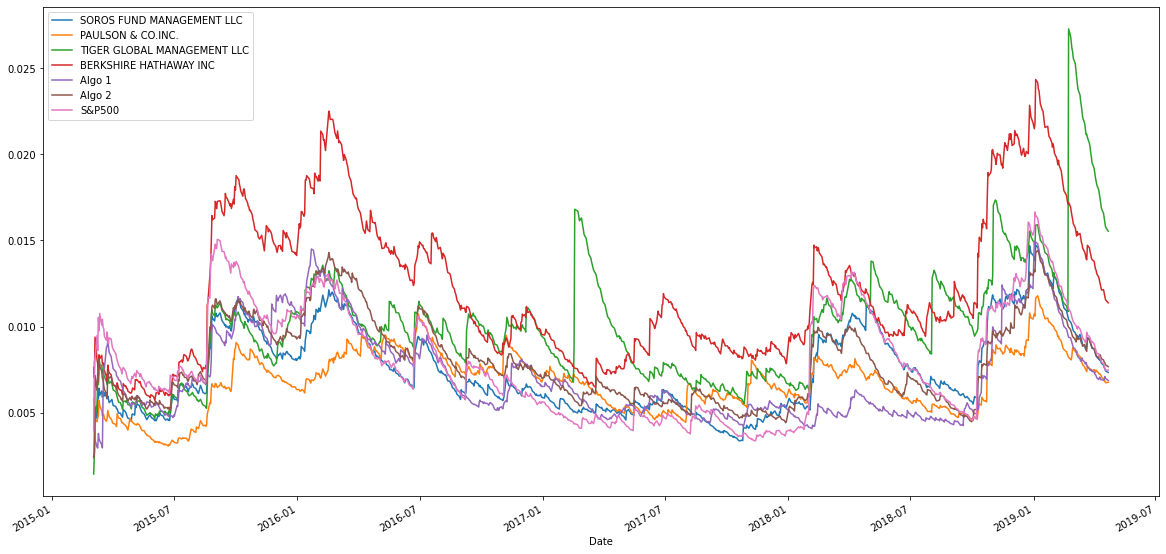

In [615]:
# Use `ewm` to calculate the rolling window
ewm_returns_std = combined_returns.ewm(halflife = 21).std()
ewm_returns_std.plot(figsize = (20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [616]:
# Annualized Sharpe Ratios
sharpe_ratios = pd.DataFrame((combined_returns.mean() / combined_returns.std() * np.sqrt(252)).round(4))

<AxesSubplot:>

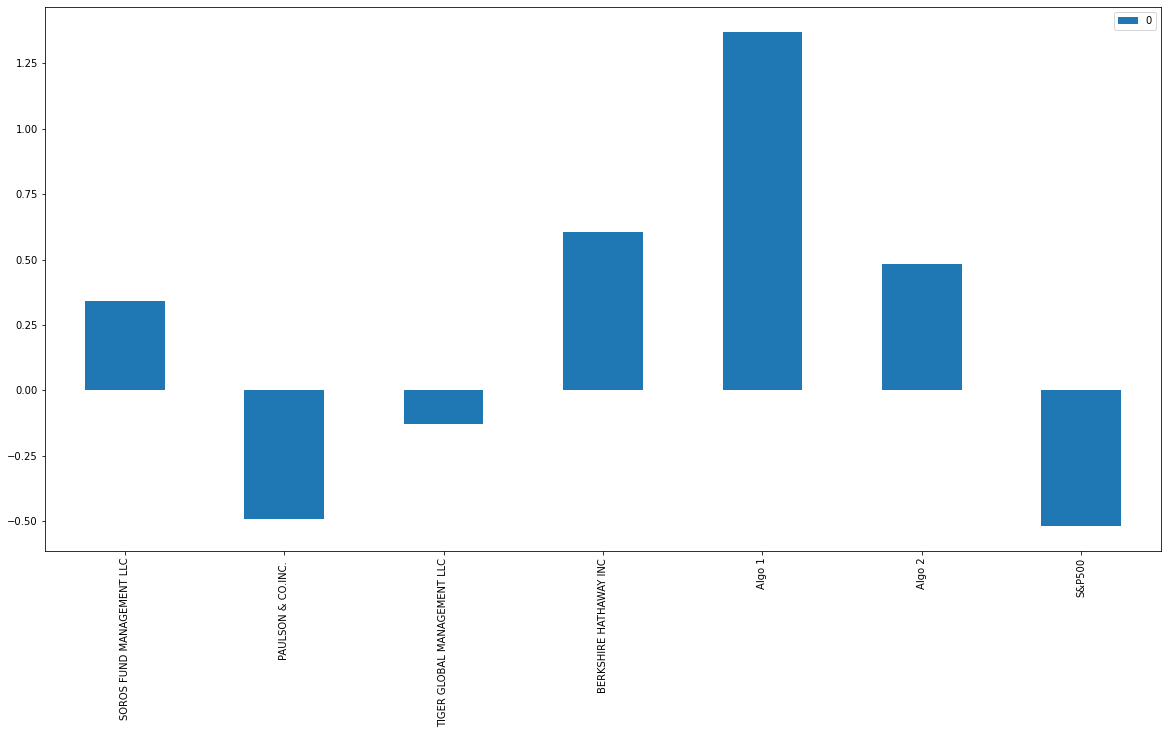

In [617]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", figsize = (20, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The algo 1 strategy crushed the S&P 500 and the whales' portfolios by generating the most return for every unit of risk taken on.  The algo 2 strategy also did well to beat the market and most of the whales' portfolios, losing only to the dominant algo 1 strategy and Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [618]:
# Reading data from 1st stock
aapl_prices = pd.read_csv("./Resources/aapl_historical.csv", index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
aapl_prices = aapl_prices.rename(columns = {"Symbol":"AAPL"}).copy()
aapl_prices = aapl_prices.rename(columns = {"NOCP":"AAPL_Close"}).copy()
aapl_prices.sample(3)

,AAPL,AAPL_Close
Trade DATE,,
2018-06-15,AAPL,188.84
2019-03-19,AAPL,186.53
2018-06-26,AAPL,184.43


In [619]:
# Reading data from 2nd stock
cost_prices = pd.read_csv(".\Resources\cost_historical.csv", index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
cost_prices = cost_prices.rename(columns = {"Symbol":"COST"}).copy()
cost_prices = cost_prices.rename(columns = {"NOCP":"COST_Close"}).copy()
cost_prices.sample(3)

,COST,COST_Close
Trade DATE,,
2019-01-03,COST,200.42
2018-08-23,COST,229.51
2019-03-28,COST,241.22


In [620]:
# Reading data from 3rd stock
goog_prices = pd.read_csv("./Resources/goog_historical.csv", index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
goog_prices = goog_prices.rename(columns = {"Symbol":"GOOG"}).copy()
goog_prices = goog_prices.rename(columns = {"NOCP":"GOOG_Close"}).copy()
goog_prices.sample(3)

,GOOG,GOOG_Close
Trade DATE,,
2019-02-28,GOOG,1119.92
2019-05-08,GOOG,1166.27
2019-04-26,GOOG,1272.18


In [621]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([aapl_prices, cost_prices, goog_prices], axis = "columns", join = "inner")
combined_stocks.sample(3)

,AAPL,AAPL_Close,COST,COST_Close,GOOG,GOOG_Close
Trade DATE,,,,,,
2018-08-31,AAPL,227.63,COST,233.13,GOOG,1218.19
2019-01-30,AAPL,165.25,COST,211.35,GOOG,1089.06
2018-06-07,AAPL,193.46,COST,202.57,GOOG,1123.86


In [622]:
# Reset Date index
combined_stocks = combined_stocks.drop(columns = {"AAPL", "COST", "GOOG"})
combined_stocks.head()

,AAPL_Close,COST_Close,GOOG_Close
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [623]:
# Reorganize portfolio data by having a column per symbol
    #See above
# Reverse List
combined_stocks = combined_stocks.sort_index(axis = 0, ascending = True)
combined_stocks.head()

,AAPL_Close,COST_Close,GOOG_Close
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [624]:
# Calculate daily returns
custom_portfolio_returns = combined_stocks.pct_change()
# Drop NAs
custom_portfolio_returns.dropna(inplace = True)
# Display sample data
custom_portfolio_returns.sample(3)

,AAPL_Close,COST_Close,GOOG_Close
Trade DATE,,,
2019-04-09,-0.002999,-0.006531,-0.005474
2019-04-17,0.019473,0.000897,0.007505
2018-11-27,-0.002176,0.016222,-0.004015


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [625]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_return = pd.DataFrame(custom_portfolio_returns.dot(weights))
# Display sample data
weighted_portfolio_return.rename(columns = {0:"Weighted_Portfolio_Return"}, inplace = True)
weighted_portfolio_return.sample(3)


,Weighted_Portfolio_Return
Trade DATE,
2019-01-22,-0.017759
2019-01-30,0.033365
2018-10-11,-0.002367


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [626]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_comparison = pd.concat([weighted_portfolio_return, combined_returns], axis = "columns", join = "inner")
portfolio_comparison.sample(3)

,Weighted_Portfolio_Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2018-08-10,-0.002059,-0.005578,-0.002446,-0.00630,-0.016537,-0.000590,-0.004511,0.004022
2018-07-11,-0.005200,-0.006965,-0.010102,-0.00604,-0.006874,0.001985,-0.007463,-0.008673
2018-11-13,-0.004642,0.000000,0.000000,0.00000,0.000000,-0.007843,-0.001947,0.007625


In [627]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_comparison.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [628]:
# Calculate the annualized `std`
portfolio_comparison_std = portfolio_comparison.std()
portfolio_comparison_std.sample(3)

TIGER GLOBAL MANAGEMENT LLC    0.014671
Algo 2                         0.008788
SOROS FUND MANAGEMENT LLC      0.009248
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

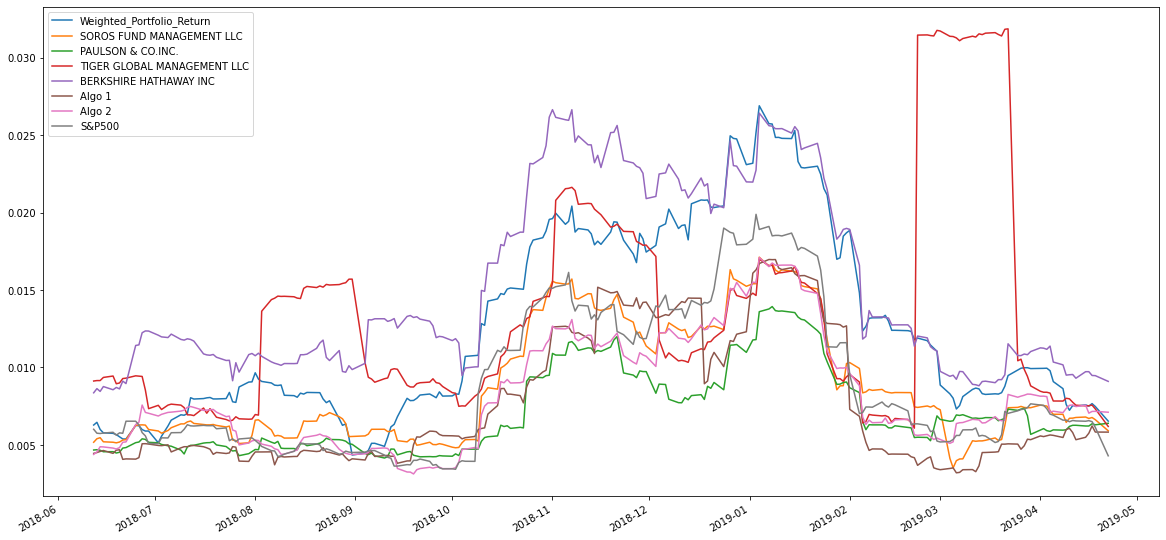

In [629]:
# Calculate rolling standard deviation
portfolio_comparison_rolling_std = portfolio_comparison.rolling(window = 21).std()
# Plot rolling standard deviation
portfolio_comparison_rolling_std.plot(figsize = (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

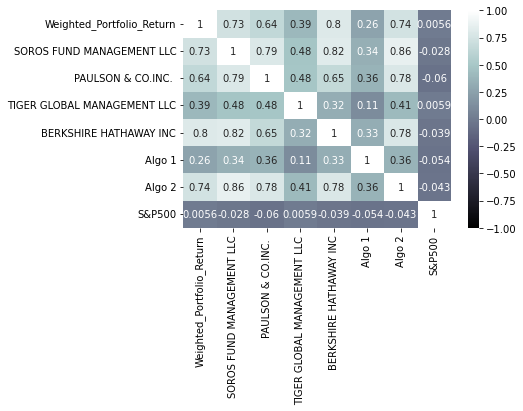

In [630]:
# Calculate and plot the correlation
sns.heatmap(portfolio_comparison.corr(), vmin = -1, vmax = 1, annot = True, cmap = "bone")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

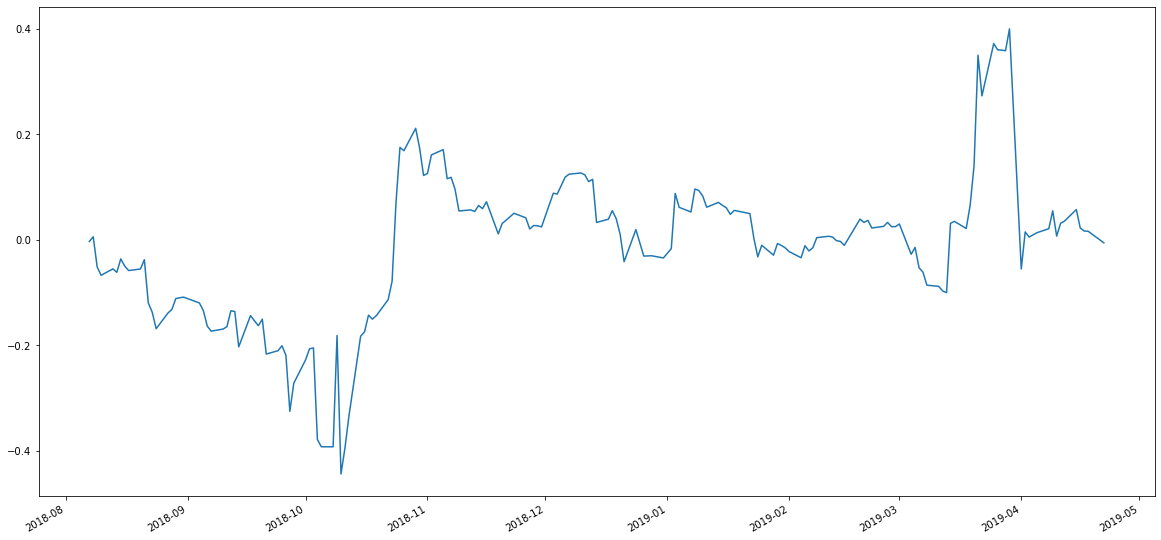

In [631]:
# Calculate and plot Beta
covariance_custom_portfolio = portfolio_comparison["Weighted_Portfolio_Return"].rolling(window = 60).cov(portfolio_comparison["S&P500"])
variance_sp500 = portfolio_comparison["S&P500"].rolling(window = 60).var()
beta_custom_portfolio = (covariance_custom_portfolio / variance_sp500)
beta_custom_portfolio.plot(figsize = (20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [632]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = pd.DataFrame((portfolio_comparison.mean() / portfolio_comparison.std() * np.sqrt(252)).round(4))

<AxesSubplot:>

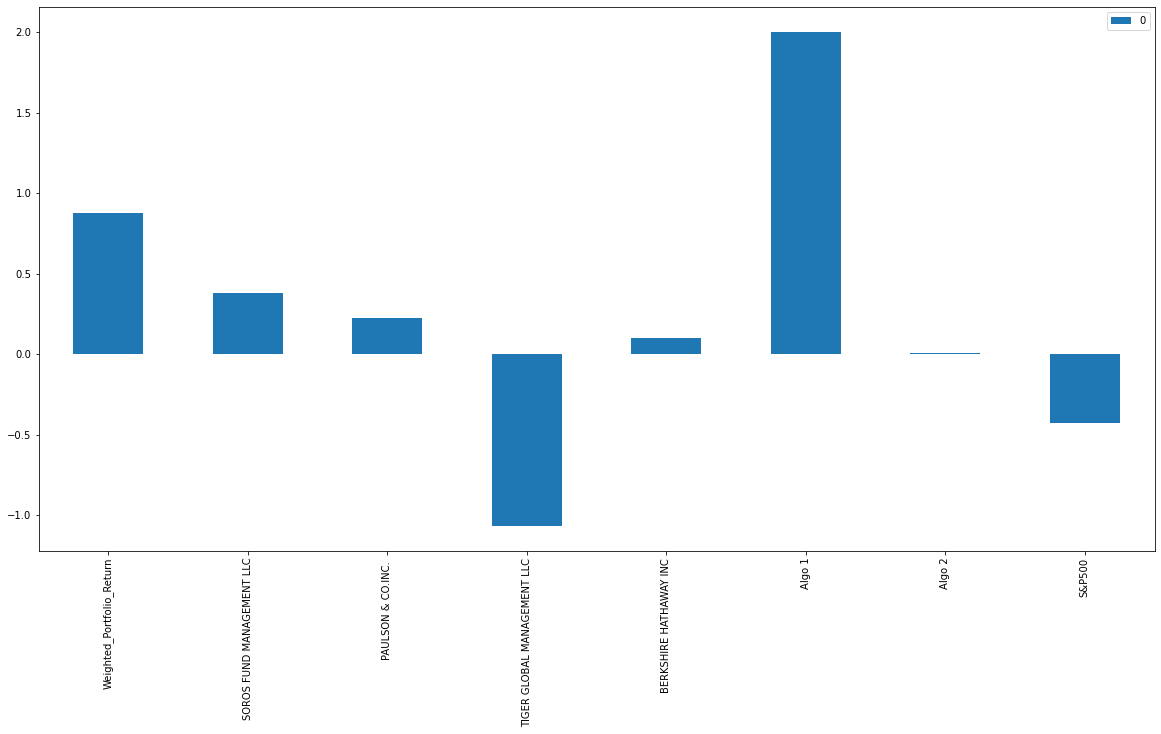

In [633]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind = "bar", figsize = (20, 10))

### How does your portfolio do?

Write your answer here!

My portfolio beats all of the whales' portfolios, the S&P500, and the algo 2 strategy.  It only loses to the algo 2 strategy in terms of generated return per unit of risk taken.